Install Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('/content/train.csv')
display(df.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
toxicity_types = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Melt the DataFrame to have one row per toxicity type per comment
melted_df = df.melt(id_vars=['id'],
                    value_vars=toxicity_types,
                    var_name='toxicity_type',
                    value_name='is_toxic')

# Filter for rows where 'is_toxic' is 1
toxic_distribution = melted_df[melted_df['is_toxic'] == 1]

display(toxic_distribution.head())

,id,toxicity_type,is_toxic
6,0002bcb3da6cb337,toxic,1
12,0005c987bdfc9d4b,toxic,1
16,0007e25b2121310b,toxic,1
42,001810bf8c45bf5f,toxic,1
43,00190820581d90ce,toxic,1


/tmp/ipython-input-2518340485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='toxicity_type', y='count', data=toxicity_counts, palette='viridis')


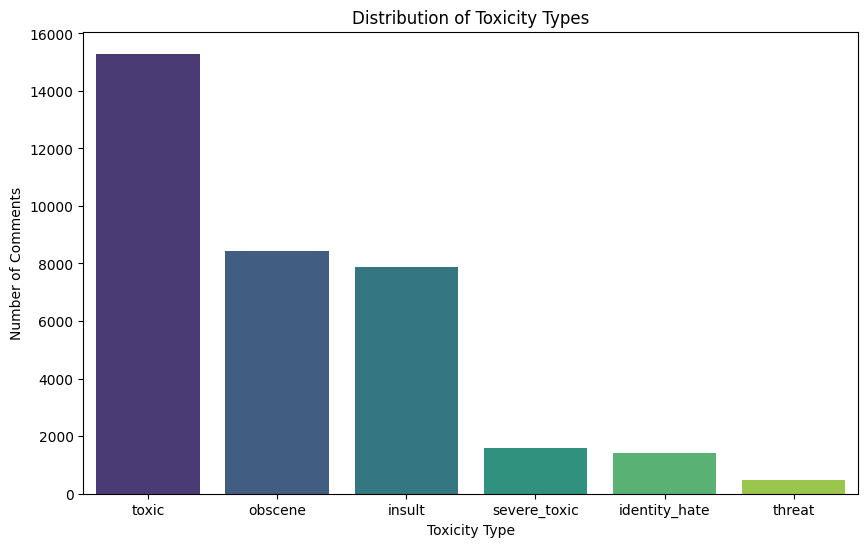

In [5]:
# Count the occurrences of each toxicity type
toxicity_counts = toxic_distribution['toxicity_type'].value_counts().reset_index()
toxicity_counts.columns = ['toxicity_type', 'count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='toxicity_type', y='count', data=toxicity_counts, palette='viridis')
plt.title('Distribution of Toxicity Types')
plt.xlabel('Toxicity Type')
plt.ylabel('Number of Comments')
plt.show()

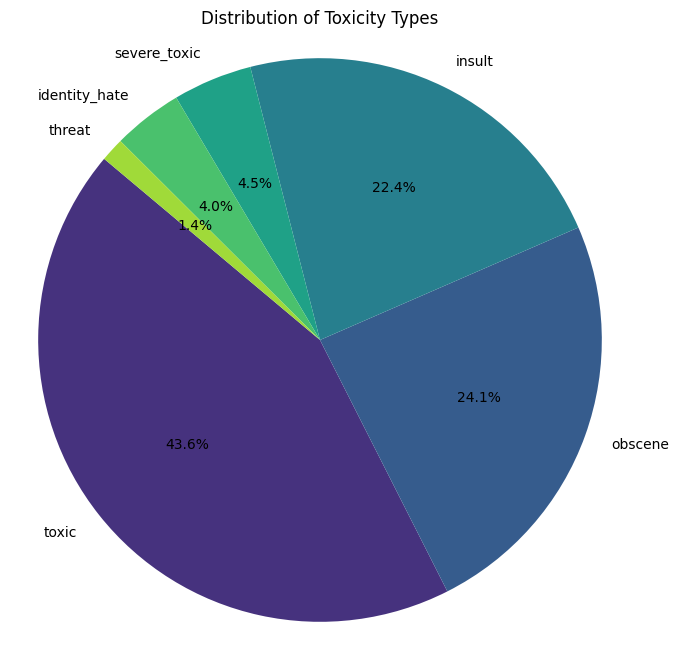

In [6]:
plt.figure(figsize=(8, 8))
plt.pie(toxicity_counts['count'], labels=toxicity_counts['toxicity_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(toxicity_counts)))
plt.title('Distribution of Toxicity Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text-length

In [7]:
df['text_length'] = df['comment_text'].apply(len)
display(df.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [8]:
melted_df_lengths = df.melt(id_vars=['id', 'text_length'],
                           value_vars=toxicity_types,
                           var_name='toxicity_type',
                           value_name='is_toxic')

display(melted_df_lengths.head())

,id,text_length,toxicity_type,is_toxic
0,0000997932d777bf,264,toxic,0
1,000103f0d9cfb60f,112,toxic,0
2,000113f07ec002fd,233,toxic,0
3,0001b41b1c6bb37e,622,toxic,0
4,0001d958c54c6e35,67,toxic,0


In [9]:
toxic_melted_df_lengths = melted_df_lengths[melted_df_lengths['is_toxic'] == 1]
display(toxic_melted_df_lengths.head())

,id,text_length,toxicity_type,is_toxic
6,0002bcb3da6cb337,44,toxic,1
12,0005c987bdfc9d4b,319,toxic,1
16,0007e25b2121310b,57,toxic,1
42,001810bf8c45bf5f,648,toxic,1
43,00190820581d90ce,40,toxic,1


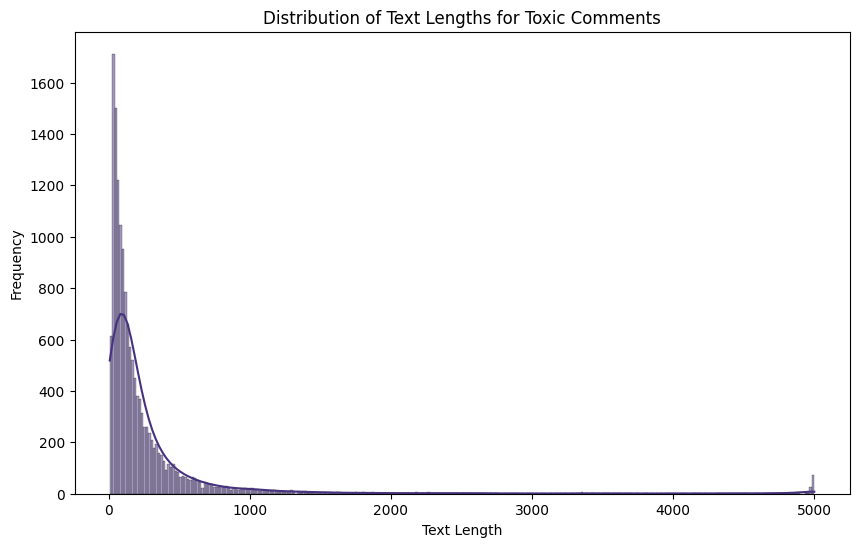

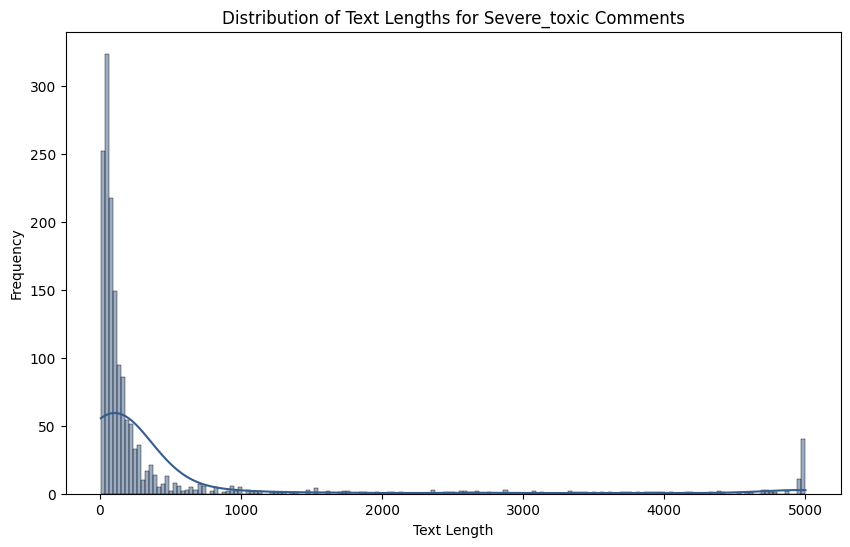

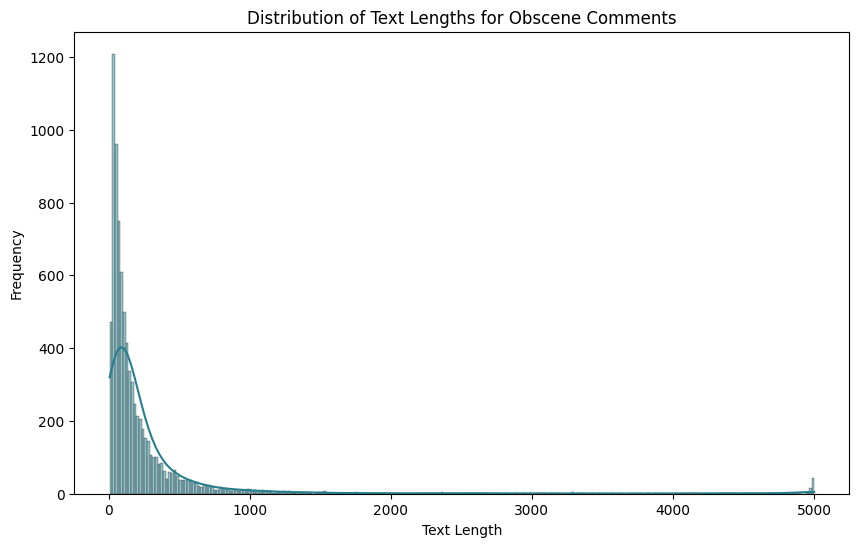

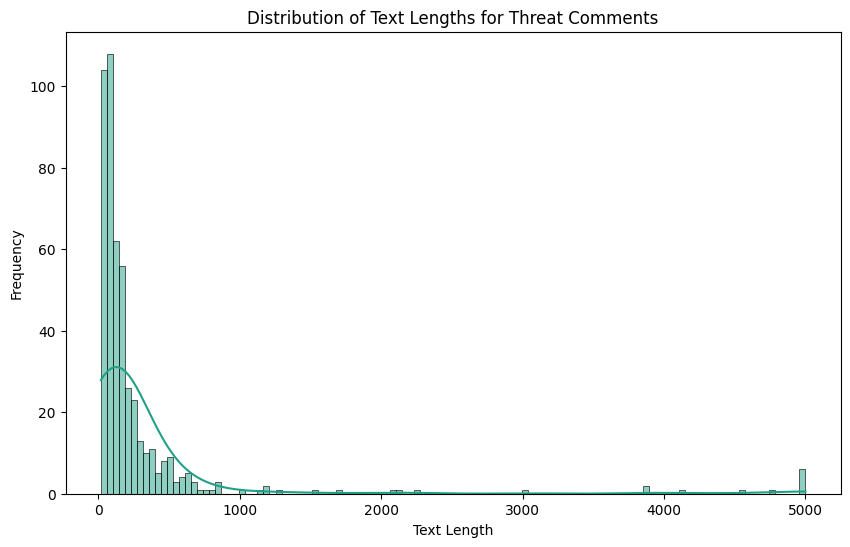

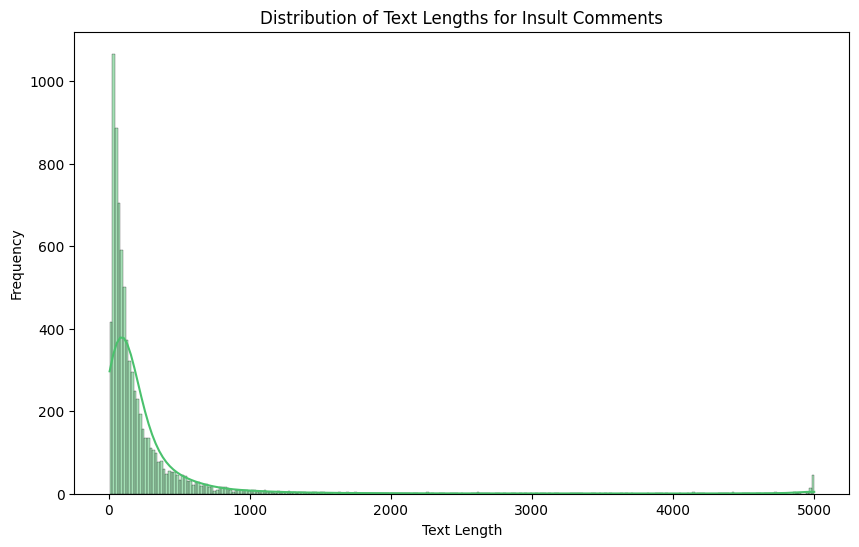

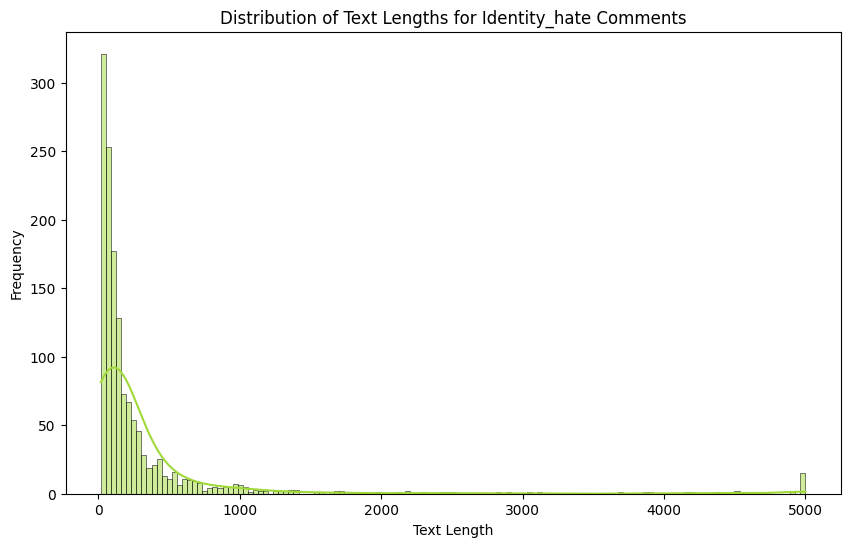

In [10]:
# Get the unique toxicity types
unique_toxicity_types = toxic_melted_df_lengths['toxicity_type'].unique()

# Create histograms for each toxicity type
for toxicity_type in unique_toxicity_types:
    plt.figure(figsize=(10, 6))
    subset_df = toxic_melted_df_lengths[toxic_melted_df_lengths['toxicity_type'] == toxicity_type]
    sns.histplot(data=subset_df, x='text_length', kde=True, color=sns.color_palette('viridis')[unique_toxicity_types.tolist().index(toxicity_type)])
    plt.title(f'Distribution of Text Lengths for {toxicity_type.capitalize()} Comments')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

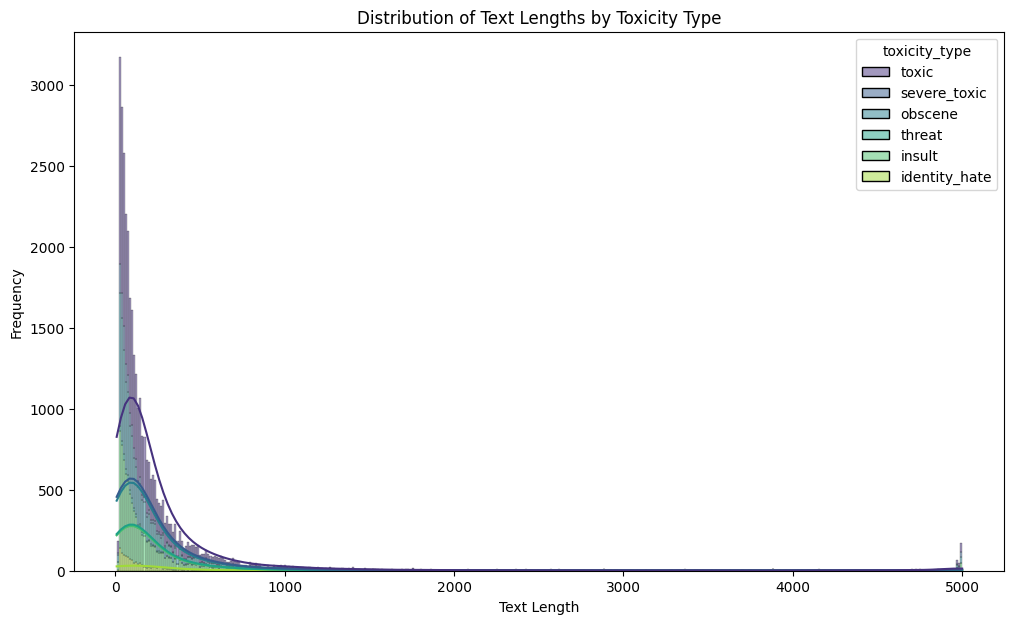

In [11]:
plt.figure(figsize=(12, 7))
sns.histplot(data=toxic_melted_df_lengths, x='text_length', hue='toxicity_type', kde=True, palette='viridis', multiple='stack')
plt.title('Distribution of Text Lengths by Toxicity Type')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Word_cloud

In [12]:
toxicity_types = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

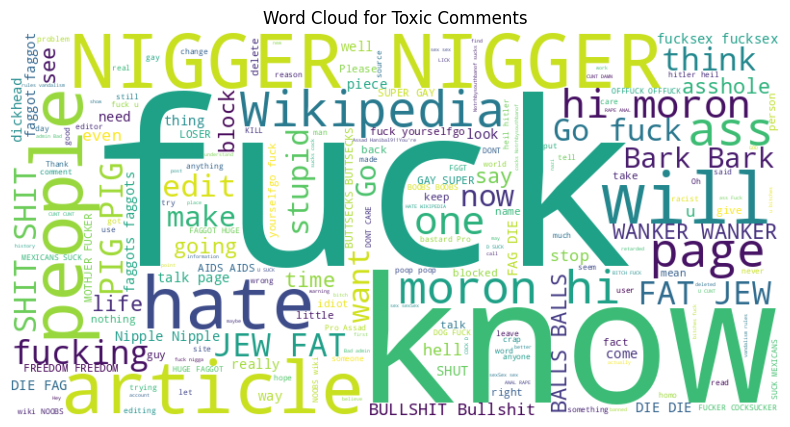

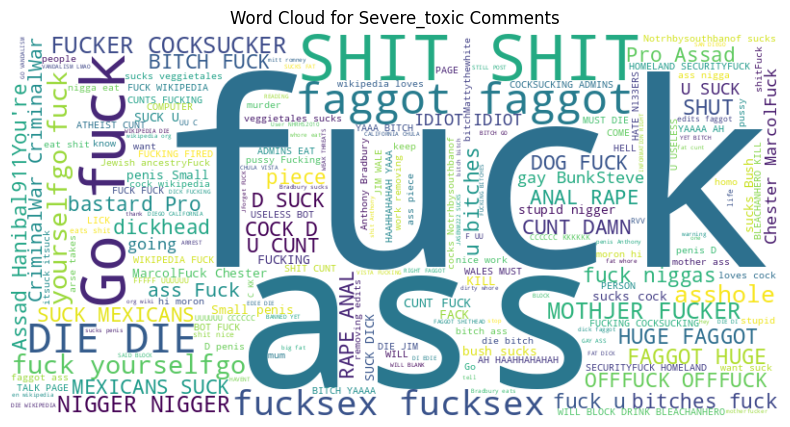

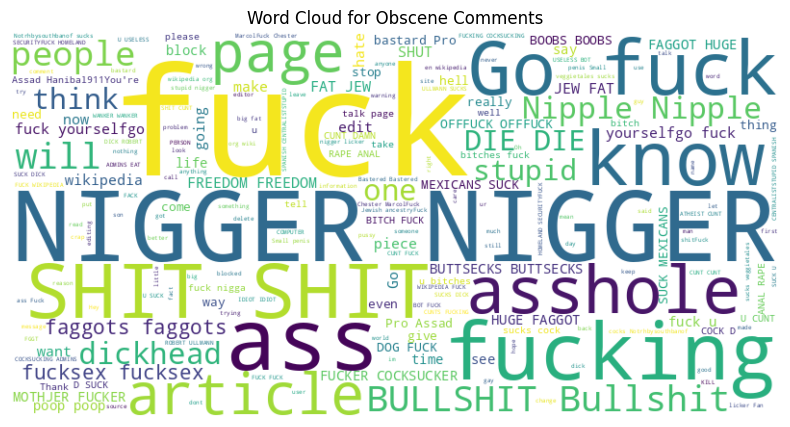

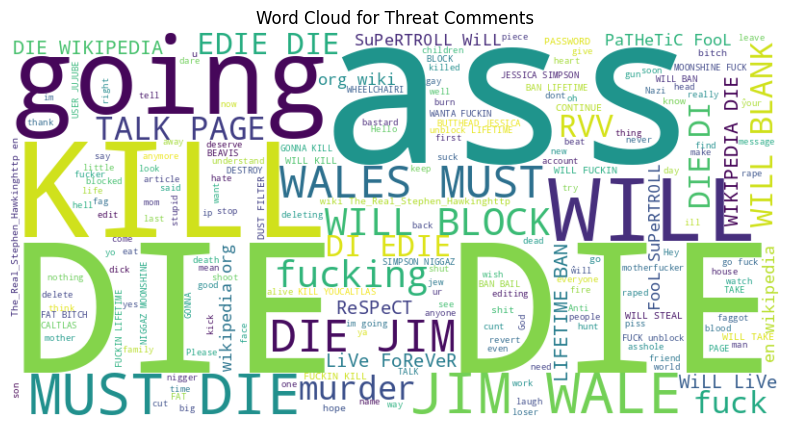

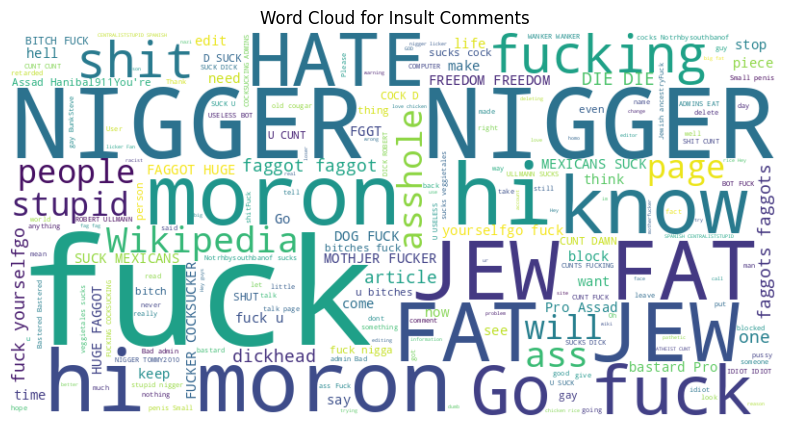

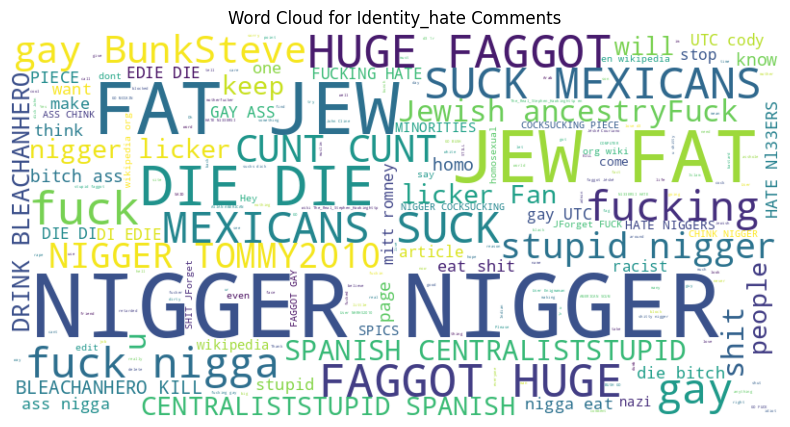

In [13]:
from wordcloud import WordCloud

for toxicity_type in toxicity_types:
    # Filter the DataFrame for the current toxicity type
    toxic_comments = df[df[toxicity_type] == 1]['comment_text']

    # Concatenate all the comment text into a single string
    all_toxic_text = ' '.join(toxic_comments)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_toxic_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {toxicity_type.capitalize()} Comments')
    plt.show()